#**Bank Customer Churn Dataset**

Setiap bank ingin menahan pelanggan untuk mempertahankan bisnis mereka termasuk Bank Multinasional ABC.

Di bawah ini adalah data nasabah pemegang rekening di ABC Multinational Bank dan data tersebut bertujuan untuk memprediksi Customer Churn.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## REQUIRED LIBRARIES
# For data wrangling 
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

BC = pd.read_csv('/content/drive/MyDrive/fp/Bank Customer Churn Prediction.csv')
BC.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**About Dataset**

This dataset is for ABC Multistate bank with following columns:

    customer_id, unused variable.
    credit_score, used as input.
    country, used as input.
    gender, used as input.
    age, used as input.
    tenure, used as input.
    balance, used as input.
    products_number, used as input.
    credit_card, used as input.
    active_member, used as input.
    estimated_salary, used as input.
    churn, used as the target. 1 if the client has left the bank during some period or 0 if he/she has not.

Aim is to Predict the Customer Churn for ABC Bank.

In [ ]:
BC.shape

(10000, 12)

In [ ]:
# Check columns list and missing values
BC.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

Tidak ada data missing value

In [ ]:
# Get unique count for each variable
BC.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [ ]:
BC.duplicated().sum()

0

Untuk data customer_id sebaiknya dihiraukan saja. karena hanya menampilkan nomor kepesertaan nasabah saja. data yang terduplikasi 0.

In [ ]:
# Drop the columns as explained above
BC = BC.drop(["customer_id"], axis = 1)

In [ ]:
# Review the top rows of what is left of the data frame
BC.head()



,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
BC.dtypes

credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

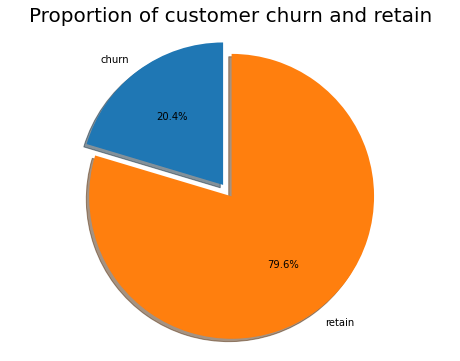

In [ ]:
labels = 'churn', 'retain'
sizes = [BC.churn[BC['churn']==1].count(), BC.churn[BC['churn']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churn and retain", size = 20)
plt.show()

Sekitar 20,4 % data nasabah Bank ini yang memutuskan berhenti menggunakan pelayanannya. sekarang saya akan coba untuk mengidentifikasi apakah benar-benar sekitar 20% nasabah di Bank ini berhenti berlangganan dengan membandingkan data pembandingnya 79 % nasabah yang memilih bertahan menggunakan jasa layanannya.

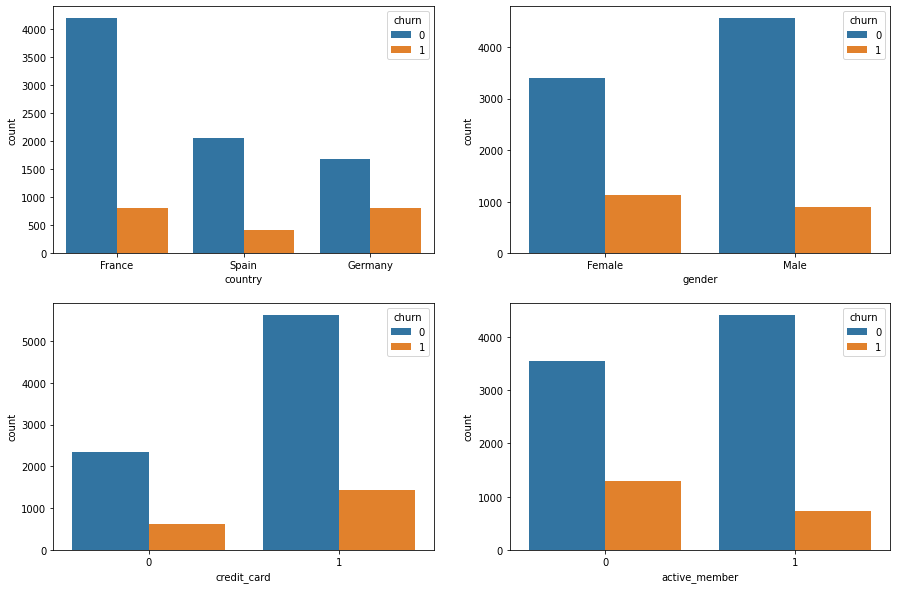

In [ ]:


    #mereview relasi antara churn dengan variabel kategori lainnya

    fig, axarr = plt.subplots(2, 2, figsize=(15, 10))
    sns.countplot(x='country', hue = 'churn',data = BC, ax=axarr[0][0])
    sns.countplot(x='gender', hue = 'churn',data = BC, ax=axarr[0][1])
    sns.countplot(x='credit_card', hue = 'churn',data = BC, ax=axarr[1][0])
    sns.countplot(x='active_member', hue = 'churn',data = BC, ax=axarr[1][1])



Apa yang saya lihat dari hasil analisa di atas :
1. kebanyakan nasabah berada di negara prancis dibandingkan 2 negara lainnya. hal ini bisa timbul karena SDM pada negara spanyol dan german tidak banyak dialokasikan di 2 wilayah tersebut sehingga potensi nasabah yang dapat di grab dan di maintenance sangat kecil.

2. Jika dilihat dari segi gender, nasabah wanita memiliki potensi churn lebih besar daripada nasabah pria.

3. Jika dilihat dari segi kartu kredit justru yang memiliki kartu kredit lebih banyak berpotensi churn dibandingkan yang tidak memiliki kartu kredit. harus dipertimbangkan lagi kesinambungan satu produk dengan produk lainnya agar dapat mengurangi potensi churn di pengguna kartu kredit.

4. Dari segi keaktifan member sangat lah bisa dilihat kalau nasabah yang tidak terlalu aktif akan mengalami potensi churn yang lebih besar. sehingga perlu diperharikan kembali program Bank untuk mengubha perilaku nasabah yang tidak terlalu aktif ini menjadi aktif.

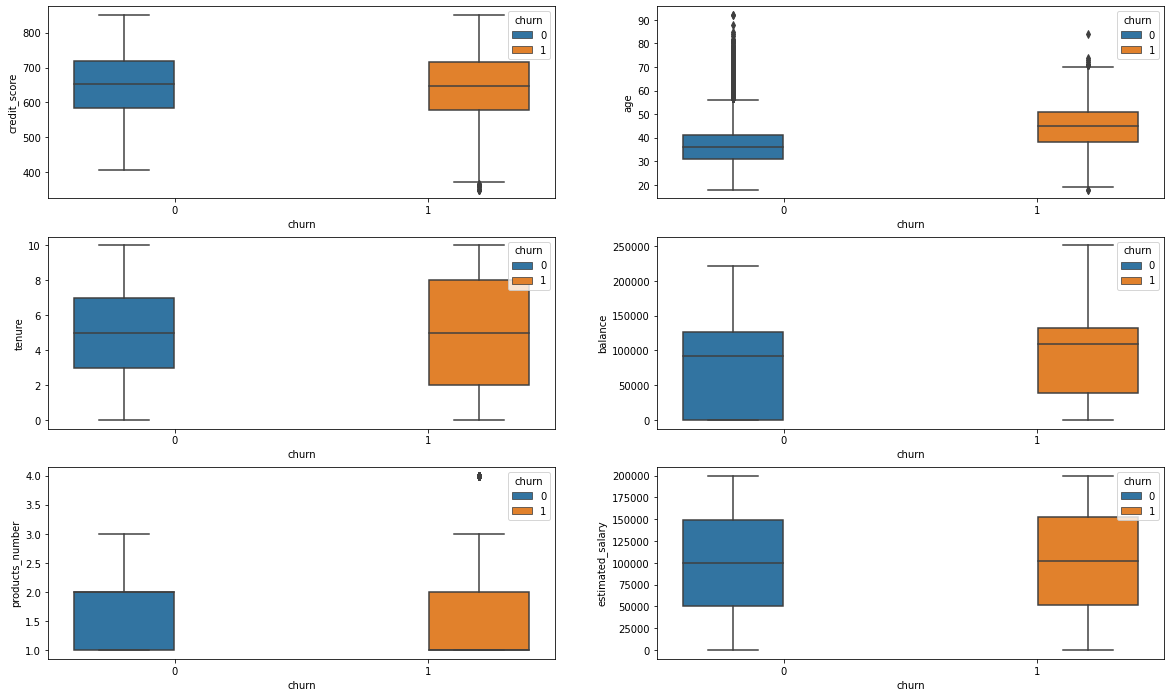

In [ ]:
    # relasi berdasarkan atribut data kontinu
    fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
    sns.boxplot(y='credit_score',x = 'churn', hue = 'churn',data = BC, ax=axarr[0][0])
    sns.boxplot(y='age',x = 'churn', hue = 'churn',data = BC , ax=axarr[0][1])
    sns.boxplot(y='tenure',x = 'churn', hue = 'churn',data = BC, ax=axarr[1][0])
    sns.boxplot(y='balance',x = 'churn', hue = 'churn',data = BC, ax=axarr[1][1])
    sns.boxplot(y='products_number',x = 'churn', hue = 'churn',data = BC, ax=axarr[2][0])
    sns.boxplot(y='estimated_salary',x = 'churn', hue = 'churn',data = BC, ax=axarr[2][1])

Apa yang saya dapat : 

I.Tidak ada perbedaan yang signifikan dalam distribusi skor kredit antara pelanggan yang dipertahankan dan pelanggan yang berhenti.

II.Pelanggan yang lebih tua lebih sering beralih daripada pelanggan yang lebih muda yang mengacu pada perbedaan preferensi layanan dalam kategori usia. Bank mungkin perlu meninjau target pasar mereka atau meninjau strategi untuk retensi antara kelompok usia yang berbeda.

III.Berkenaan dengan tenor, klien pada kedua ujung ekstrim (menghabiskan sedikit waktu dengan bank atau banyak waktu dengan bank) lebih cenderung churn dibandingkan dengan mereka yang memiliki tenor rata-rata.

IV.Perlu menjadi catatan Bank kehilangan pelanggan dengan saldo bank yang signifikan yang kemungkinan akan menekan modal yang tersedia untuk pinjaman.

V.Baik produk maupun gaji tidak memiliki pengaruh yang signifikan terhadap kemungkinan churn.

## **Feature engineering**

penambahan fitur yang mungkin akan berdampak pada churning. menggunakan metode split train dan test data.

In [ ]:
# Split Train, test data
BC_train = BC.sample(frac=0.8,random_state=200)
BC_test = BC.drop(BC_train.index)
print(len(BC_train))
print(len(BC_test))

8000
2000


(-1.0, 5.0)

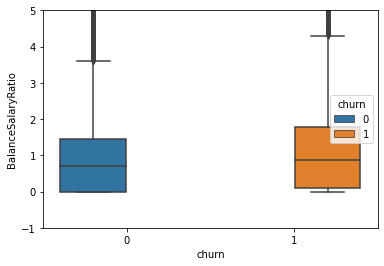

In [ ]:
BC_train['BalanceSalaryRatio'] = BC_train.balance/BC_train.estimated_salary
sns.boxplot(y='BalanceSalaryRatio',x = 'churn', hue = 'churn',data = BC_train)
plt.ylim(-1, 5)

Disini dapat dilihat bahwa gaji memiliki pengaruh kecil pada kemungkinan pelanggan berhenti berlangganan (churn). Namun jika di telaah kembali, rasio saldo bank dan perkiraan gaji menunjukkan bahwa pelanggan dengan rasio gaji saldo yang lebih tinggi lebih banyak yang churn hal ini membuat khawatir terhadap sumber modal pinjaman Bank tersebut.

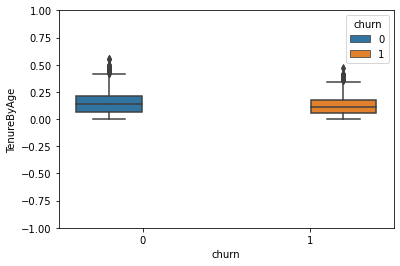

In [ ]:
BC_train['TenureByAge'] = BC_train.tenure/(BC_train.age)
sns.boxplot(y='TenureByAge',x = 'churn', hue = 'churn',data = BC_train)
plt.ylim(-1, 1)
plt.show()

yang bisa diambil dari grafik ini bahwa kepesertaan nasabah berdasarkan umur dengan tenor program yang diambil tidak terlalu signifikan berpotensi untuk churn.

In [ ]:
BC_train['CreditScoreGivenAge'] = BC_train.credit_score/(BC_train.age)

In [ ]:
BC_train.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
8159,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0,0.000000,0.240000,18.440000
6332,619,France,Female,35,4,90413.12,1,1,1,20555.21,0,4.398550,0.114286,17.685714
8895,699,France,Female,40,8,122038.34,1,1,0,102085.35,0,1.195454,0.200000,17.475000
5351,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0,1.117305,0.048780,13.609756
4314,638,France,Male,34,5,133501.36,1,0,1,155643.04,0,0.857741,0.147059,18.764706


## **Data prep for model fitting**

In [ ]:
continuous_vars = ['credit_score',  'age', 'tenure', 'balance','products_number', 'estimated_salary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
cat_vars = ['credit_card', 'active_member','country', 'gender']
BC_train = BC_train[['churn'] + continuous_vars + cat_vars]
BC_train.head()

,churn,credit_score,age,tenure,balance,products_number,estimated_salary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,credit_card,active_member,country,gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,0,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,0,1,France,Male


In [ ]:
BC_train.loc[BC_train.credit_card == 0, 'credit_card'] = -1
BC_train.loc[BC_train.active_member == 0, 'active_member'] = -1
BC_train.head()

,churn,credit_score,age,tenure,balance,products_number,estimated_salary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,credit_card,active_member,country,gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,France,Male


In [ ]:
# One hot encode the categorical variables
lst = ['country', 'gender']
remove = list()
for i in lst:
    if (BC_train[i].dtype == np.str or BC_train[i].dtype == np.object):
        for j in BC_train[i].unique():
            BC_train[i+'_'+j] = np.where(BC_train[i] == j,1,-1)
        remove.append(i)
BC_train = BC_train.drop(remove, axis=1)
BC_train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


,churn,credit_score,age,tenure,balance,products_number,estimated_salary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,credit_card,active_member,country_Spain,country_France,country_Germany,gender_Female,gender_Male
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,1,-1,-1,1,-1
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,-1,1,-1,1,-1
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,-1,1,-1,1,-1
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,-1,-1,1,-1,1
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,-1,1,-1,-1,1


In [ ]:
# minMax scaling the continuous variables
minVec = BC_train[continuous_vars].min().copy()
maxVec = BC_train[continuous_vars].max().copy()
BC_train[continuous_vars] = (BC_train[continuous_vars]-minVec)/(maxVec-minVec)
BC_train.head()

,churn,credit_score,age,tenure,balance,products_number,estimated_salary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,credit_card,active_member,country_Spain,country_France,country_Germany,gender_Female,gender_Male
8159,0,0.222,0.094595,0.6,0.000000,0.333333,0.076118,0.000000,0.432000,0.323157,1,1,1,-1,-1,1,-1
6332,0,0.538,0.229730,0.4,0.360358,0.000000,0.102376,0.003317,0.205714,0.305211,1,1,-1,1,-1,1,-1
8895,0,0.698,0.297297,0.8,0.486406,0.000000,0.510225,0.000901,0.360000,0.300198,1,-1,-1,1,-1,1,-1
5351,0,0.416,0.310811,0.2,0.495130,0.000000,0.555744,0.000843,0.087805,0.208238,1,1,-1,-1,1,-1,1
4314,0,0.576,0.216216,0.5,0.532094,0.000000,0.778145,0.000647,0.264706,0.330882,-1,1,-1,1,-1,-1,1


In [ ]:
# data prep pipeline for test data
def BCPrepPipeline(BC_predict,BC_train_Cols,minVec,maxVec):
    # Add new features
    BC_predict['BalanceSalaryRatio'] = BC_predict.balance/BC_predict.estimated_salary
    BC_predict['TenureByAge'] = BC_predict.tenure/(BC_predict.age - 18)
    BC_predict['CreditScoreGivenAge'] = BC_predict.credit_score/(BC_predict.age - 18)
    # Reorder the columns
    continuous_vars = ['credit_score',  'age', 'tenure', 'balance','products_number', 'estimated_salary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
    cat_vars = ['credit_card', 'active_member','country', 'gender']
    BC_predict = BC_predict[['churn'] + continuous_vars + cat_vars]
    # Change the 0 in categorical variables to -1
    BC_predict.loc[BC_predict.credit_card == 0, 'credit_card'] = -1
    BC_predict.loc[BC_predict.active_member == 0, 'active_member'] = -1
    # One hot encode the categorical variables
    lst = ["country", "gender"]
    remove = list()
    for i in lst:
        for j in BC_predict[i].unique():
            BC_predict[i+'_'+j] = np.where(BC_predict[i] == j,1,-1)
        remove.append(i)
    BC_predict = BC_predict.drop(remove, axis=1)
    # Ensure that all one hot encoded variables that appear in the train data appear in the subsequent data
    L = list(set(BC_train_Cols) - set(BC_predict.columns))
    for l in L:
        BC_predict[str(l)] = -1        
    # MinMax scaling coontinuous variables based on min and max from the train data
    BC_predict[continuous_vars] = (BC_predict[continuous_vars]-minVec)/(maxVec-minVec)
    # Ensure that The variables are ordered in the same way as was ordered in the train set
    BC_predict = BC_predict[BC_train_Cols]
    return BC_predict



## **Model fitting and selection**


Untuk model fitting, saya akan mencoba metode :
*   Logistic regression
*   SVM
*   Random Forest
*   Extreme Gradient Boost Classifier

In [ ]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
# Function to give best model score and parameters
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_BC, tpr_BC, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_BC, tpr_BC)

NOTE : Bagian dibawah ini membutuhkan waktu yang sangat lama ketika dijalankan sehigga saya lewatkan kebagian berikutnya yang mana proses runningnya tidak membutuhkan waktu yang lama. lanjut ke bagian fit best model.

In [ ]:

# Fit primal logistic regression
#param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
#              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
#log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=0)
#log_primal_Grid.fit(BC_train.loc[:, BC_train.columns != 'churn'],BC_train.churn)
#best_model(log_primal_Grid)



In [ ]:
# Fit logistic regression with degree 2 polynomial kernel
#param_grid = {'C': [0.1,10,50], 'max_iter': [300,500], 'fit_intercept':[True],'intercept_scaling':[1],'penalty':['l2'],
              #'tol':[0.0001,0.000001]}
#poly2 = PolynomialFeatures(degree=2)
#BC_train_pol2 = poly2.fit_transform(BC_train.loc[:, BC_train.columns != 'churn'])
#log_pol2_Grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5, refit=True, verbose=0)
#log_pol2_Grid.fit(BC_train_pol2,BC_train.churn)
#best_model(log_pol2_Grid)



In [ ]:
# Fit SVM with RBF Kernel
#param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
#SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
#SVM_grid.fit(BC_train.loc[:, BC_train.columns != 'churn'],BC_train.churn)
#best_model(SVM_grid)


In [ ]:
# Fit SVM with RBF Kernel
#param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
#SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
#SVM_grid.fit(BC_train.loc[:, BC_train.columns != 'churn'],BC_train.churn)
#best_model(SVM_grid)

In [ ]:
# Fit random forest classifier
#param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
#RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
#RanFor_grid.fit(BC_train.loc[:, BC_train.columns != 'churn'],BC_train.churn)
#best_model(RanFor_grid)

In [ ]:
# Fit Extreme Gradient boosting classifier
#param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
#xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
#xgb_grid.fit(BC_train.loc[:, BC_train.columns != 'churn'],BC_train.churn)
#best_model(xgb_grid)

## **Fit best Models**

In [ ]:
# Fit primal logistic regression
log_primal = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=250, multi_class='auto',n_jobs=None, 
                                penalty='l2', random_state=None, solver='lbfgs',tol=0.0001, verbose=0, warm_start=False)
log_primal.fit(BC_train.loc[:, BC_train.columns != 'churn'],BC_train.churn)

LogisticRegression(C=100, max_iter=250)

In [ ]:
# Fit logistic regression with pol 2 kernel
poly2 = PolynomialFeatures(degree=2)
BC_train_pol2 = poly2.fit_transform(BC_train.loc[:, BC_train.columns != 'churn'])
log_pol2 = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=300, multi_class='auto', n_jobs=None, 
                              penalty='l2', random_state=None, solver='liblinear',tol=0.0001, verbose=0, warm_start=False)
log_pol2.fit(BC_train_pol2,BC_train.churn)

LogisticRegression(C=10, max_iter=300, solver='liblinear')

In [ ]:
# Fit SVM with RBF Kernel
SVM_RBF = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True, 
              random_state=None, shrinking=True,tol=0.001, verbose=False)
SVM_RBF.fit(BC_train.loc[:, BC_train.columns != 'churn'],BC_train.churn)

SVC(C=100, gamma=0.1, probability=True)

In [ ]:
# Fit SVM with Pol Kernel
SVM_POL = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',  max_iter=-1,
              probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)
SVM_POL.fit(BC_train.loc[:, BC_train.columns != 'churn'],BC_train.churn)

SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)

In [ ]:
# Fit Random Forest classifier
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, max_features=6, max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)
RF.fit(BC_train.loc[:, BC_train.columns != 'churn'],BC_train.churn)



RandomForestClassifier(max_depth=8, max_features=6, min_samples_split=3,
                       n_estimators=50)

In [ ]:
# Fit Extreme Gradient Boost Classifier
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0.01, learning_rate=0.1, max_delta_step=0,max_depth=7,
                    min_child_weight=5, missing=None, n_estimators=20,n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0, 
                    reg_lambda=1, scale_pos_weight=1, seed=None, silent=True, subsample=1)
XGB.fit(BC_train.loc[:, BC_train.columns != 'churn'],BC_train.churn)

XGBClassifier(gamma=0.01, max_depth=7, min_child_weight=5, n_estimators=20,
              silent=True)

### **Meninjau akurasi kecocokan model terbaik : Minat yang besar pada kinerja dalam memprediksi Pelanggan yang churn**

In [ ]:
print(classification_report(BC_train.churn, log_primal.predict(BC_train.loc[:, BC_train.columns != 'churn'])))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      6353
           1       0.64      0.24      0.35      1647

    accuracy                           0.82      8000
   macro avg       0.73      0.60      0.62      8000
weighted avg       0.79      0.82      0.78      8000



In [ ]:
print(classification_report(BC_train.churn,  log_pol2.predict(BC_train_pol2)))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      6353
           1       0.77      0.46      0.57      1647

    accuracy                           0.86      8000
   macro avg       0.82      0.71      0.75      8000
weighted avg       0.85      0.86      0.85      8000



In [ ]:
print(classification_report(BC_train.churn,  SVM_RBF.predict(BC_train.loc[:, BC_train.columns != 'churn'])))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6353
           1       0.85      0.40      0.54      1647

    accuracy                           0.86      8000
   macro avg       0.86      0.69      0.73      8000
weighted avg       0.86      0.86      0.84      8000



In [ ]:
print(classification_report(BC_train.churn,  SVM_POL.predict(BC_train.loc[:, BC_train.columns != 'churn'])))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6353
           1       0.84      0.38      0.52      1647

    accuracy                           0.86      8000
   macro avg       0.85      0.68      0.72      8000
weighted avg       0.85      0.86      0.83      8000



In [ ]:
print(classification_report(BC_train.churn,  RF.predict(BC_train.loc[:, BC_train.columns != 'churn'])))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6353
           1       0.88      0.52      0.66      1647

    accuracy                           0.89      8000
   macro avg       0.89      0.75      0.80      8000
weighted avg       0.89      0.89      0.88      8000



In [ ]:
print(classification_report(BC_train.churn,  XGB.predict(BC_train.loc[:, BC_train.columns != 'churn'])))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6353
           1       0.83      0.53      0.64      1647

    accuracy                           0.88      8000
   macro avg       0.86      0.75      0.79      8000
weighted avg       0.88      0.88      0.87      8000



In [ ]:
y = BC_train.churn
X = BC_train.loc[:, BC_train.columns != 'churn']
X_pol2 = BC_train_pol2
auc_log_primal, fpr_log_primal, tpr_log_primal = get_auc_scores(y, log_primal.predict(X),log_primal.predict_proba(X)[:,1])
auc_log_pol2, fpr_log_pol2, tpr_log_pol2 = get_auc_scores(y, log_pol2.predict(X_pol2),log_pol2.predict_proba(X_pol2)[:,1])
auc_SVM_RBF, fpr_SVM_RBF, tpr_SVM_RBF = get_auc_scores(y, SVM_RBF.predict(X),SVM_RBF.predict_proba(X)[:,1])
auc_SVM_POL, fpr_SVM_POL, tpr_SVM_POL = get_auc_scores(y, SVM_POL.predict(X),SVM_POL.predict_proba(X)[:,1])
auc_RF, fpr_RF, tpr_RF = get_auc_scores(y, RF.predict(X),RF.predict_proba(X)[:,1])
auc_XGB, fpr_XGB, tpr_XGB = get_auc_scores(y, XGB.predict(X),XGB.predict_proba(X)[:,1])

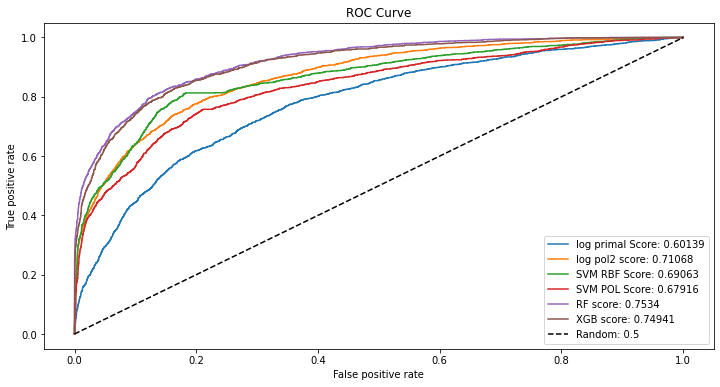

In [ ]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_log_primal, tpr_log_primal, label = 'log primal Score: ' + str(round(auc_log_primal, 5)))
plt.plot(fpr_log_pol2, tpr_log_pol2, label = 'log pol2 score: ' + str(round(auc_log_pol2, 5)))
plt.plot(fpr_SVM_RBF, tpr_SVM_RBF, label = 'SVM RBF Score: ' + str(round(auc_SVM_RBF, 5)))
plt.plot(fpr_SVM_POL, tpr_SVM_POL, label = 'SVM POL Score: ' + str(round(auc_SVM_POL, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'RF score: ' + str(round(auc_RF, 5)))
plt.plot(fpr_XGB, tpr_XGB, label = 'XGB score: ' + str(round(auc_XGB, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

Dari hasil di atas, tujuan utama saya adalah untuk memprediksi pelanggan yang mungkin akan churn sehingga mereka dapat dimasukkan ke dalam semacam skema untuk mencegah churn maka langkah-langkah penarikan kembali pada 1 lebih penting bagi saya daripada skor akurasi keseluruhan dari model.
Mengingat bahwa dalam data ini hanya memiliki 20% churn, penarikan yang lebih besar dari baseline ini sudah merupakan peningkatan tetapi kami ingin mendapatkan setinggi mungkin sambil berusaha mempertahankan presisi tinggi sehingga Bank dapat melatih sumber dayanya secara efektif menuju klien disorot oleh model tanpa membuang terlalu banyak sumber daya pada positif palsu.
Dari review model-model yang dipasang di atas, model terbaik yang memberikan keseimbangan yang layak antara recall dan precision adalah random forest dimana menurut fit pada training set, dengan nilai presisi pada 1 sebesar 0,88, dari semua pelanggan yang model berpikir akan churn, 88% benar-benar churn dan dengan skor recall 0,52 pada 1, model mampu menyoroti 52% dari semua yang churn.

**Test model prediction accuracy on test data**

In [ ]:
# Make the data transformation for test data
BC_test = BCPrepPipeline(BC_test,BC_train.columns,minVec,maxVec)
BC_test = BC_test.mask(np.isinf(BC_test))
BC_test = BC_test.dropna()
BC_test.shape

(1996, 17)

In [ ]:
print(classification_report(BC_test.churn,  RF.predict(BC_test.loc[:, BC_test.columns != 'churn'])))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.79      0.40      0.53       389

    accuracy                           0.86      1996
   macro avg       0.83      0.69      0.73      1996
weighted avg       0.85      0.86      0.84      1996



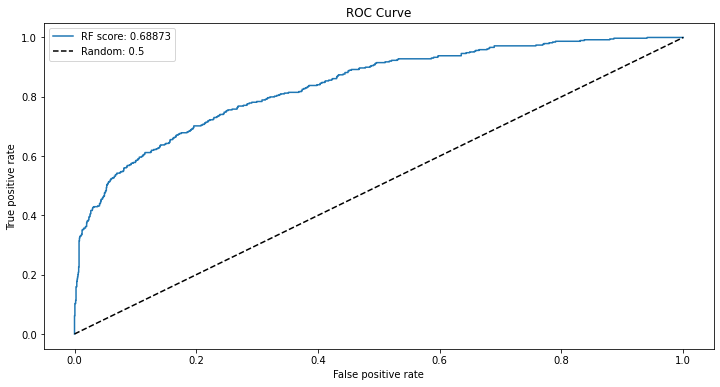

In [ ]:
auc_RF_test, fpr_RF_test, tpr_RF_test = get_auc_scores(BC_test.churn, RF.predict(BC_test.loc[:, BC_test.columns != 'churn']),
                                                       RF.predict_proba(BC_test.loc[:, BC_test.columns != 'churn'])[:,1])
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_RF_test, tpr_RF_test, label = 'RF score: ' + str(round(auc_RF_test, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

Ketepatan model pada data uji yang tidak terlihat sebelumnya sedikit lebih tinggi dalam hal memprediksi 1 yaitu pelanggan yang churn. Namun, sebanyak model memiliki akurasi tinggi, masih meleset sekitar setengah dari mereka yang akhirnya churn. Ini dapat ditingkatkan dengan menyediakan pelatihan ulang model dengan lebih banyak data dari waktu ke waktu.